In [13]:
import pandas as pd
import os

# Initialize an empty list to store the dataframes
dataframes = []

# Specify the directory containing the CSV files
directory_path = "../../CSE_DATA/SHARE_CHANGE/"

filenames = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.csv')]

# Initialize an empty DataFrame to store the data
data = pd.DataFrame()

# Loop through the CSV files and read them into DataFrames
for file in filenames:
    df = pd.read_csv(file)
    # Extract the label from the file name and remove the ".csv" extension
    label = os.path.basename(file).replace(".csv", "")
    # Add the label as a new column
    df['Label'] = label
    dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Filter out data associated with the label 'SWAD.N0000'
combined_df = combined_df[combined_df['Label'] != 'SWAD.N0000']

# Convert 'Trade Date' from MM/DD/YY to DD/MM/YYYY format
combined_df['Trade Date'] = pd.to_datetime(combined_df['Trade Date'], format='%m/%d/%y').dt.strftime('%d/%m/%Y')

# Split 'Trade Date' into 'Day', 'Month', and 'Year' columns
combined_df[['Day', 'Month', 'Year']] = combined_df['Trade Date'].str.split('/', expand=True)


# Select the columns 'Label', 'Day', 'Month', 'Year', and 'Close (Rs.)'
selected_columns = ['Label', 'Day', 'Month', 'Year', 'Close (Rs.)']
result_df = combined_df[selected_columns]


# Group by 'Label', 'Year', and 'Month' and calculate the median
final_result = result_df.groupby(['Label', 'Year', 'Month'])['Close (Rs.)'].median().reset_index()


# Sort the DataFrame by 'Label' and the new date columns
final_result = final_result.sort_values(by=['Year', 'Month', 'Label'])

print(final_result)

            Label  Year Month  Close (Rs.)
19629   JKH.N0000  1986    08         0.00
35686   SUN.N0000  1990    03        12.50
16090  GREG.N0000  1990    04         0.50
32359  SELI.N0000  1991    01       550.00
33994  SHAL.N0000  1991    02       575.00
...           ...   ...   ...          ...
40074  VPEL.N0000  2023    10         6.80
40078  WAPO.N0000  2023    10        31.50
40388  WATA.N0000  2023    10        74.20
40419  WIND.N0000  2023    10        18.55
40423  YORK.N0000  2023    10       165.00

[40424 rows x 4 columns]


In [14]:

# Replace 'your_existing_file.csv' with the actual path to your CSV file
csv_file = 'loan_rates_result.csv'

# Read the CSV file into a DataFrame
loan_rates_1990_2023 = pd.read_csv(csv_file)

# Display the DataFrame
print(loan_rates_1990_2023)

     Year  Month  Loan Rate
0    1990      1       18.7
1    1990      2       18.7
2    1990      3       18.7
3    1990      4       18.7
4    1990      5       18.7
..    ...    ...        ...
401  2023      6       14.0
402  2023      7       12.0
403  2023      8       12.0
404  2023      9       12.0
405  2023     10       12.0

[406 rows x 3 columns]


In [15]:
final_result['Year'] = final_result['Year'].astype(int)
final_result['Month'] = final_result['Month'].astype(int)

loan_rates_1990_2023['Year'] = loan_rates_1990_2023['Year'].astype(int)
loan_rates_1990_2023['Month'] = loan_rates_1990_2023['Month'].astype(int)

# Perform a left join based on 'Year' and 'Month' columns
result = final_result.merge(loan_rates_1990_2023, on=['Year', 'Month'], how='left')

# Display the resulting DataFrame
print(result)

            Label  Year  Month  Close (Rs.)  Loan Rate
0       JKH.N0000  1986      8         0.00        NaN
1       SUN.N0000  1990      3        12.50       18.7
2      GREG.N0000  1990      4         0.50       18.7
3      SELI.N0000  1991      1       550.00       19.3
4      SHAL.N0000  1991      2       575.00       19.3
...           ...   ...    ...          ...        ...
40419  VPEL.N0000  2023     10         6.80       12.0
40420  WAPO.N0000  2023     10        31.50       12.0
40421  WATA.N0000  2023     10        74.20       12.0
40422  WIND.N0000  2023     10        18.55       12.0
40423  YORK.N0000  2023     10       165.00       12.0

[40424 rows x 5 columns]


In [16]:
final_result['Year'] = final_result['Year'].astype(int)
final_result['Month'] = final_result['Month'].astype(int)

loan_rates_1990_2023['Year'] = loan_rates_1990_2023['Year'].astype(int)
loan_rates_1990_2023['Month'] = loan_rates_1990_2023['Month'].astype(int)

# Perform a left join based on 'Year' and 'Month' columns
result = final_result.merge(loan_rates_1990_2023, on=['Year', 'Month'], how='left')

# Assuming 'result' is your DataFrame
result = result.dropna(subset=['Loan Rate'])

# Display the resulting DataFrame
print(result)

# Assuming 'result' is your DataFrame after removing NaN values
result.to_csv('final_loan_rate_vs_stock_values.csv', index=False)

            Label  Year  Month  Close (Rs.)  Loan Rate
1       SUN.N0000  1990      3        12.50       18.7
2      GREG.N0000  1990      4         0.50       18.7
3      SELI.N0000  1991      1       550.00       19.3
4      SHAL.N0000  1991      2       575.00       19.3
5      KZOO.N0000  1991      4       125.00       19.3
...           ...   ...    ...          ...        ...
40419  VPEL.N0000  2023     10         6.80       12.0
40420  WAPO.N0000  2023     10        31.50       12.0
40421  WATA.N0000  2023     10        74.20       12.0
40422  WIND.N0000  2023     10        18.55       12.0
40423  YORK.N0000  2023     10       165.00       12.0

[40423 rows x 5 columns]


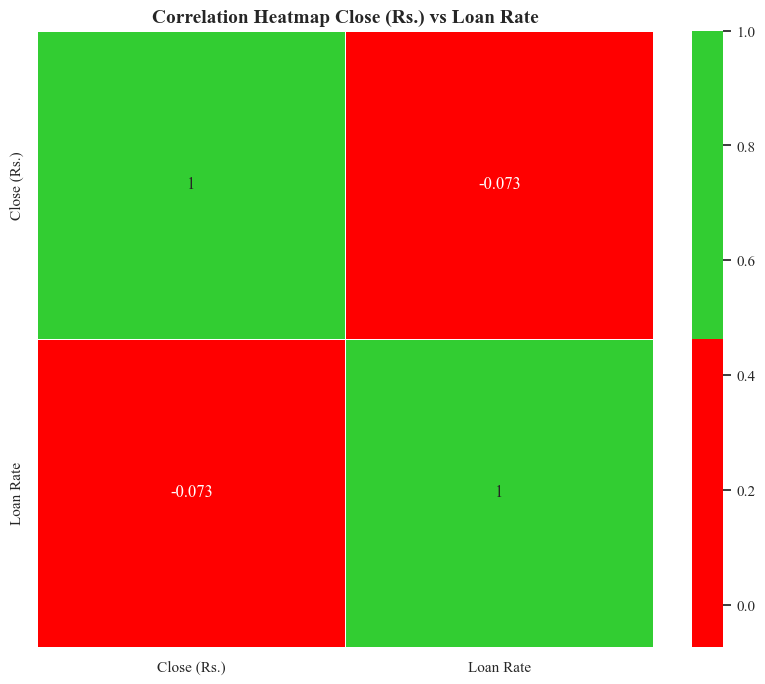

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your DataFrame
data = pd.read_csv('./final_loan_rate_vs_stock_values.csv')

df = pd.DataFrame(data)

# Select the columns you want for the heatmap
columns = ['Close (Rs.)', 'Loan Rate']

# Create a correlation matrix
corr_matrix = df[columns].corr()

# Create custom color palette with "Close (Rs.)" in red and "Loan Rate" in green
colors = ['red', 'limegreen']
cmap = sns.color_palette(colors, as_cmap=True)

# Set the font style to Times New Roman
sns.set(style="white", font='Times New Roman')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap=cmap, linewidths=0.5, square=True)
plt.title('Correlation Heatmap Close (Rs.) vs Loan Rate', fontweight='bold', fontsize=14)
plt.show()